In [ ]:
import pandas as pd 
import glob

In [43]:
files = glob.glob("/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/*/05.count/*_matrix.tsv.gz")

In [44]:
files

['/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/YS_1212_CCRF_20_Nlib/05.count/YS_1212_CCRF_20_Nlib_matrix.tsv.gz',
 '/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/YS_1212_CCRF_CK_Nlib/05.count/YS_1212_CCRF_CK_Nlib_matrix.tsv.gz',
 '/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/YS_1212_CCRF_60_Nlib/05.count/YS_1212_CCRF_60_Nlib_matrix.tsv.gz']

In [45]:
df = pd.read_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/YS_1212_CCRF_20_Nlib/05.count/YS_1212_CCRF_20_Nlib_matrix.tsv.gz", sep='\t', index_col=0)

In [46]:
df['YS_1212_CCRF_20'] = df.apply(lambda x: x.astype(int).sum(), axis=1)

In [47]:
df = pd.DataFrame(df['YS_1212_CCRF_20'])

In [48]:
df1 = pd.read_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/YS_1212_CCRF_CK_Nlib/05.count/YS_1212_CCRF_CK_Nlib_matrix.tsv.gz", sep='\t', index_col=0)

In [49]:
df1['YS_1212_CCRF_CK'] = df1.apply(lambda x: x.astype(int).sum(), axis=1)

In [50]:
df1 = pd.DataFrame(df1['YS_1212_CCRF_CK'])

In [51]:
df2 = pd.read_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/YS_1212_CCRF_60_Nlib/05.count/YS_1212_CCRF_60_Nlib_matrix.tsv.gz", sep='\t', index_col=0)

In [52]:
df2['YS_1212_CCRF_60'] = df2.apply(lambda x: x.astype(int).sum(), axis=1)

In [53]:
df2 = pd.DataFrame(df2['YS_1212_CCRF_60'])

In [54]:
df3 = pd.read_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/YS_1208_Hela_CK_Nlib/05.count/YS_1208_Hela_CK_Nlib_matrix.tsv.gz", sep='\t', index_col=0)

In [55]:
df3['Hela_Manual'] = df3.apply(lambda x: x.astype(int).sum(), axis=1)

In [56]:
df3 = pd.DataFrame(df3['Hela_Manual'])

In [57]:
df_all = pd.merge(df, df1, left_index=True, right_index=True)
df_all = pd.merge(df_all, df2, left_index=True, right_index=True)
#df_all = pd.merge(df_all, df3, left_index=True, right_index=True)

In [58]:
df_all

,YS_1212_CCRF_20,YS_1212_CCRF_CK,YS_1212_CCRF_60
DPM1,1111,1079,752
SCYL3,182,257,208
C1orf112,360,513,375
FGR,8,30,16
FUCA2,18,15,17
...,...,...,...
AL035653.1,5,5,2
AL023806.5,4,8,8
AC016394.4,5,10,2
AL357079.3,24,22,25


In [61]:
df_res = pd.DataFrame()
samples = ["YS_1212_CCRF_20", "YS_1212_CCRF_CK", "YS_1212_CCRF_60"]
for sample1 in samples:
    temp_list = []
    for sample2 in samples:
        temp_list.append(calc_corr(df_all[sample1], df_all[sample2]))
    df_res[sample1] = temp_list
df_res.index = samples  

In [62]:
df_res

,YS_1212_CCRF_20,YS_1212_CCRF_CK,YS_1212_CCRF_60
YS_1212_CCRF_20,1.000,0.883,0.870
YS_1212_CCRF_CK,0.883,1.000,0.946
YS_1212_CCRF_60,0.870,0.946,1.000


In [ ]:
df_res1 = df_res.iloc[0:2, 0:2]
df_res2 = df_res.iloc[[0,2], [0,2]]
df_res3 = df_res.iloc[1:, 1:]

In [ ]:
df_res1

In [ ]:
df_res2

In [ ]:
df_res3

In [ ]:
df_res1.to_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/CK_20_corr.tsv", sep='\t', index=True)
df_res2.to_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/20_60.tsv", sep='\t', index=True)
df_res3.to_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/CK_60_corr.tsv")

In [60]:
import pandas as pd
from pandas import Series
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [42]:
def calc_corr(a,b):
    s1 = Series(a)
    s2 = Series(b)
    return round(s1.corr(s2), 3)

In [ ]:
df_res1

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
#绘制热力图，还要将数值写到热力图上
#每个网格上用线隔开
fig = sns.heatmap(df_res3, annot=True, cmap='YlGnBu', linewidths=.5, ax=ax, fmt=".3f", ) # vmin=0.9, vmax=1,
#设置坐标字体方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
ax.set_title('Pearson correlation between samples',fontdict={'family': 'serif', 'weight': 'bold', 'size': 18}) #plt.title('热图'),均可设置图片标题
plt.show()
boxplot = fig.get_figure()
boxplot.savefig("/SGRNJ06/randd/PROJECT/RD20052201/YS_1212_CCRF_RT/CK_60corr.pdf", dpi=640, bbox_inches ="tight")

In [63]:
# 孔间相关性
import pandas as pd 
import glob

In [118]:
files = glob.glob("/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/*/05.count/*_matrix.tsv.gz")

In [119]:
files

['/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/YS_1208_Hela_RK_Nlib/05.count/YS_1208_Hela_RK_Nlib_matrix.tsv.gz',
 '/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/YS_1208_CCRF_RK_Nlib/05.count/YS_1208_CCRF_RK_Nlib_matrix.tsv.gz',
 '/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/YS_1208_CCRF_CK_Nlib/05.count/YS_1208_CCRF_CK_Nlib_matrix.tsv.gz',
 '/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/YS_1208_Hela_CK_Nlib/05.count/YS_1208_Hela_CK_Nlib_matrix.tsv.gz']

In [142]:
df = pd.read_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/YS_1208_Hela_CK_Nlib/05.count/YS_1208_Hela_CK_Nlib_matrix.tsv.gz", sep='\t', index_col=0)

In [143]:
df.loc['Col_sum'] = df.apply(lambda x: x.astype(int).sum())

In [144]:
df = df.T

In [145]:
df = df[df['Col_sum'] >= 298882]

In [146]:
del df['Col_sum']

In [147]:
df = df.T

In [148]:
df

,Oligo_003,Oligo_004,Oligo_005,Oligo_006,Oligo_015,Oligo_016,Oligo_017,Oligo_018,Oligo_027,Oligo_028,...,Oligo_065,Oligo_066,Oligo_075,Oligo_076,Oligo_077,Oligo_078,Oligo_087,Oligo_088,Oligo_089,Oligo_090
TSPAN6,35,34,18,42,33,20,30,43,15,34,...,30,26,23,30,39,23,31,17,34,29
DPM1,35,47,11,48,40,31,41,52,9,29,...,37,38,18,30,37,20,32,23,41,51
SCYL3,6,4,0,7,3,2,3,6,1,2,...,5,3,1,1,4,1,3,2,1,5
C1orf112,11,12,1,10,21,4,8,16,3,7,...,5,7,1,8,9,3,6,3,12,13
CFH,32,40,24,33,71,14,33,48,19,50,...,32,40,24,7,46,13,36,18,18,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL023806.5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AF222685.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AC092720.3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
AL357079.3,0,0,1,1,2,1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,0


In [149]:
df_res = pd.DataFrame()
samples = list(df.columns)
for sample1 in samples:
    temp_list = []
    for sample2 in samples:
        temp_list.append(calc_corr(df[sample1], df[sample2]))
    df_res[sample1] = temp_list
df_res.index = samples  

In [150]:
df_res

,Oligo_003,Oligo_004,Oligo_005,Oligo_006,Oligo_015,Oligo_016,Oligo_017,Oligo_018,Oligo_027,Oligo_028,...,Oligo_065,Oligo_066,Oligo_075,Oligo_076,Oligo_077,Oligo_078,Oligo_087,Oligo_088,Oligo_089,Oligo_090
Oligo_003,1.000,0.892,0.882,0.957,0.960,0.885,0.924,0.932,0.903,0.916,...,0.925,0.953,0.956,0.884,0.927,0.937,0.963,0.877,0.899,0.951
Oligo_004,0.892,1.000,0.982,0.881,0.909,0.833,0.894,0.880,0.978,0.968,...,0.940,0.932,0.942,0.866,0.941,0.870,0.932,0.983,0.957,0.844
Oligo_005,0.882,0.982,1.000,0.884,0.909,0.835,0.902,0.885,0.976,0.971,...,0.934,0.929,0.946,0.872,0.936,0.871,0.929,0.994,0.956,0.835
Oligo_006,0.957,0.881,0.884,1.000,0.989,0.969,0.981,0.988,0.883,0.946,...,0.962,0.976,0.976,0.964,0.966,0.990,0.899,0.890,0.942,0.986
Oligo_015,0.960,0.909,0.909,0.989,1.000,0.962,0.988,0.990,0.911,0.966,...,0.973,0.988,0.987,0.964,0.976,0.989,0.919,0.912,0.951,0.969
Oligo_016,0.885,0.833,0.835,0.969,0.962,1.000,0.977,0.981,0.824,0.921,...,0.948,0.953,0.943,0.983,0.952,0.985,0.809,0.848,0.929,0.960
Oligo_017,0.924,0.894,0.902,0.981,0.988,0.977,1.000,0.992,0.893,0.968,...,0.976,0.983,0.978,0.979,0.979,0.988,0.879,0.909,0.955,0.952
Oligo_018,0.932,0.880,0.885,0.988,0.990,0.981,0.992,1.000,0.874,0.955,...,0.965,0.978,0.975,0.982,0.969,0.993,0.880,0.891,0.950,0.971
Oligo_027,0.903,0.978,0.976,0.883,0.911,0.824,0.893,0.874,1.000,0.963,...,0.946,0.940,0.952,0.847,0.945,0.868,0.938,0.977,0.928,0.838
Oligo_028,0.916,0.968,0.971,0.946,0.966,0.921,0.968,0.955,0.963,1.000,...,0.984,0.979,0.982,0.942,0.985,0.945,0.917,0.976,0.974,0.905


In [151]:
df_res.to_csv("/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/kongjian/Hela_Manual.tsv", sep='\t', index=True)

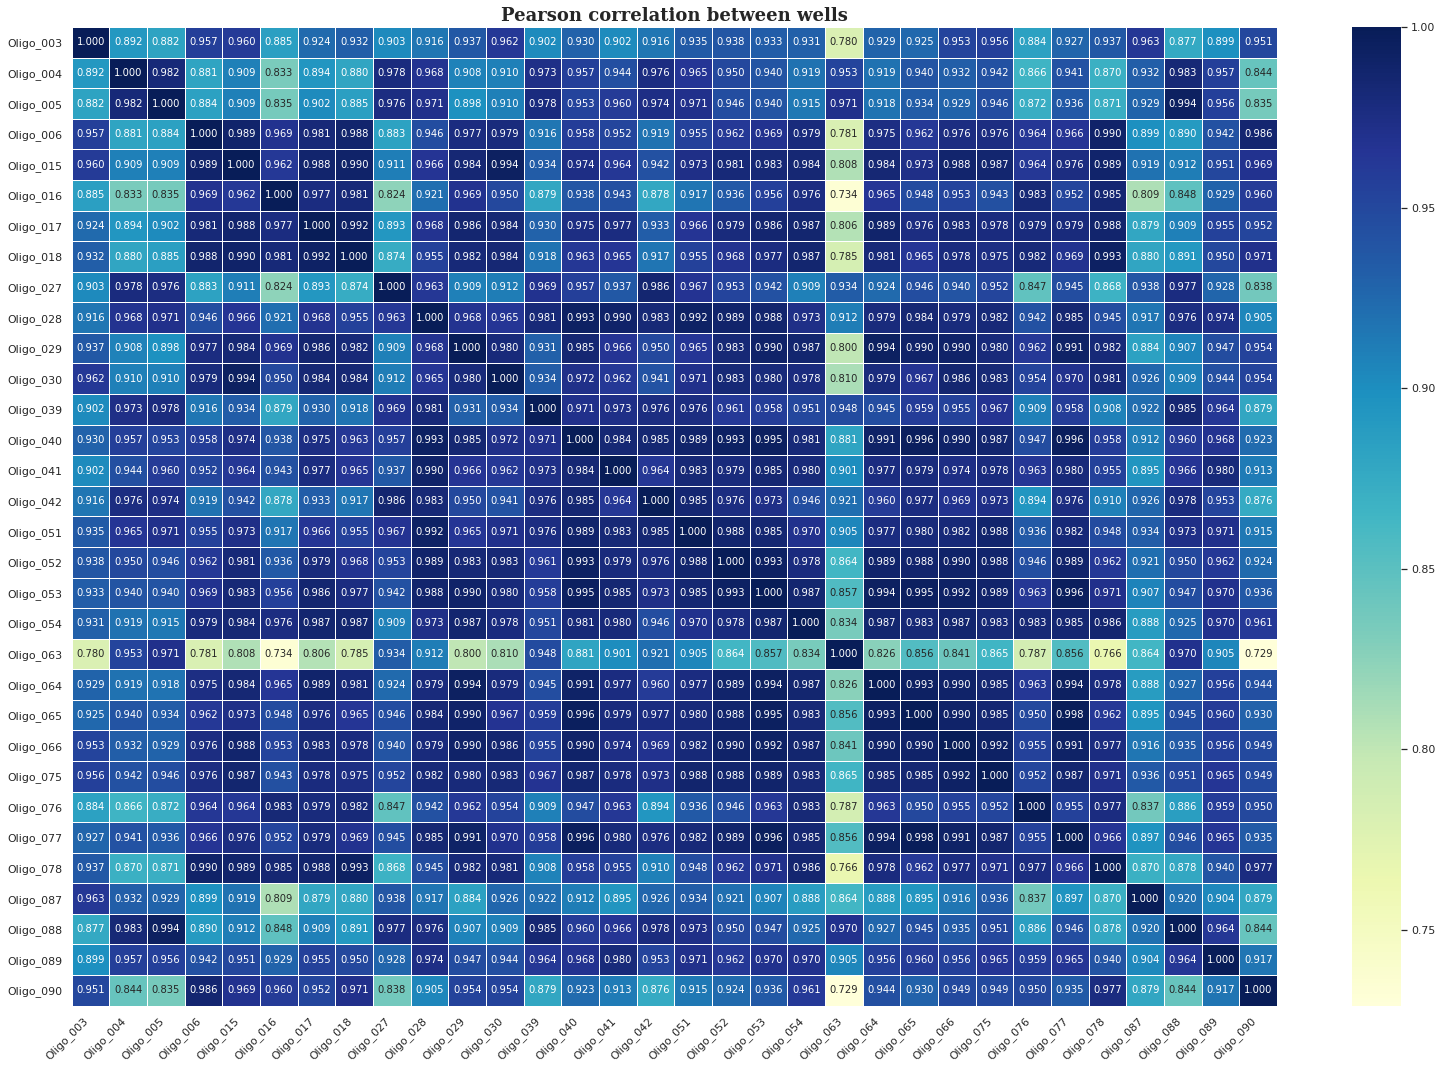

In [152]:
f, ax = plt.subplots(figsize=(27, 18))
#绘制热力图，还要将数值写到热力图上
#每个网格上用线隔开
fig = sns.heatmap(df_res, annot=True, cmap='YlGnBu', linewidths=.5, ax=ax, fmt=".3f", ) # vmin=0.9, vmax=1,
#设置坐标字体方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
ax.set_title('Pearson correlation between wells',fontdict={'family': 'serif', 'weight': 'bold', 'size': 18}) #plt.title('热图'),均可设置图片标题
plt.show()
boxplot = fig.get_figure()
boxplot.savefig("/SGRNJ06/randd/PROJECT/RD20052201/YS_RK_1208/kongjian/Hela_Manual.pdf", dpi=640, bbox_inches ="tight")